<a href="https://colab.research.google.com/github/benard3360-star/hello-world/blob/main/Sales_Forecasting_and_Supply_chain_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <h1>Introduction</h1>
</center>
<h3>Background</h3>
Data mining and retrieval encompass the operations involved in the collection, preprocessing, and postprocessing of the vast amounts of data that both private and public institutions generate daily. Given the ever-increasing volume of data, there is a growing need to analyze and extract valuable insights from this data to foster continuous growth for these organizations. By leveraging historical data, companies can identify trends, patterns, and anomalies that inform strategic decisions. The application of advanced visualization tools by data scientists plays a crucial role in this process. These tools transform complex data sets into clear, actionable visual representations

<h3>Research Problem<h3>
<center>
  <h4>Sales Forecating and Supply Chain Optimization</h4>
</center>
The technique of projecting sales into the future by employing economic study, historical data, and different predictive models is known as sales forecasting. For organizations to make well-informed decisions regarding budgeting, inventory management, and strategic planning, accurate sales forecasting is essential. Sales forecasting methods span from basic methods of statistics to sophisticated machine learning systems. Businesses that combine sales forecasting with supply chain optimization can better match their supply chain operations with market demand, eliminate excess inventory, avoid stockouts, and increase overall operational efficiency. Advanced analytics, such as the use of Natural Language Processing (NLP) to analyze market trends and customer sentiment, improve sales forecasting accuracy and supply chain process optimization.

<h3>Objectives<h3>

1. Understand historical sales patterns and trends by performing time series analysis on sales data to identify seasonal patterns, growth trends, and anomalies.

2. Determine the main factors that influence product demand by conducting exploratory data analysis to identify correlations between demand and variables such as time of year, buyer behavior and other external factors.

3. Assess the accuracy and reliability of the demand forecasting and inventory optimization models by using metrics such as, Mean Squared Error (MSE), and stockout rates to evaluate models such as Long Short-Term Memory (LSTM) and Gate Recurrent Unit (GRU) performance and make necessary adjustments.


<h3>Hypothesis<h3>

1. The transacted quantity of oil in this Company varies according to the transaction date.

2. The Buyers of the oil are influenced with the Material description

<h3>Data Description</h3>
The dataset consists of 1,832 rows and 13 columns. The data is continuously updated as transactions are recorded daily. Below is a table that describes the columns.


<table>
  <caption><b>A table showing the dataset features and their descriptions</b></caption>
  <tr>
    <th> </th>
    <th>Features</th>
    <th>Description</th>
    
    
  </tr>
  <tr>
    <td>1.</td>
    <td>Nom. Key</td>
    <td>A numeric identifier for each record</td>
  </tr>
  <tr>
    <td>2.</td>
    <td>Nom. No.</td>
    <td>Another identifier, possibly a unique transaction or order number</td>
  </tr>
  <tr>
    <td>3.</td>
    <td>Seller</td>
    <td>Name of the selling company</td>
  </tr>  
  <tr>
    <td>4.</td>
    <td>Batch Orig</td>
    <td>Batch Origin</td>
  </tr>
  <tr>
    <td>5.</td>
    <td>Buyer</td>
    <td>Name of the buying company</td>
  </tr>
  <tr>
    <td>6.</td>
    <td>Batch dest</td>
    <td>Destination batch</td>
  </tr>
  <tr>
    <td>7.</td>
    <td>Material Description</td>
    <td>Description of the material sold</td>
  </tr>
  <tr>
    <td>8.</td>
    <td>Tran. Qty.</td>
    <td>Transaction quantity</td>
  </tr>
  <tr>
    <td>9.</td>
    <td>UoM</td>
    <td>Unit of measurement</td>
  </tr>  
  <tr>
    <td>10.</td>
    <td>GR Doc.</td>
    <td>Goods receipt document number</td>
  </tr>
  <tr>
    <td>11.</td>
    <td>Tr. Date</td>
    <td>Transaction date</td>
  </tr>
  
  <tr>
    <td>12.</td>
    <td>Partn. Nom</td>
    <td>Partner nomination</td>
  </tr>
  <tr>
    <td>13.</td>
    <td>Ref Date/td>
    <td>Reference date</td>
  </tr>
 </table>

 #### Source of data
The dataset has been collected from Asharami Synergy, a leading oil and gas marketimg company in the downstream sector with operations across West Africa withits branch also in Kenya. This frontline company significantly contributes to the nation's economic growth by promoting access to reliable, affordable, and clean energy solutions. They import petroleum products and supply them both locally and internationally, playing a crucial role in meeting energy demands and supporting regional development.
#### Period of data collection
This data is received and integrated on a daily basis, ensuring it remains a real-time dataset that reflects each transaction as it occurs. This continuous updating process allows for timely and accurate insights, enabling more effective decision-making and strategy formulation.
#### How it has been collected
Due to the constraints imposed by the Data Protection and Privacy Act, accessing data is often challenging. However, I am grateful to this Petroleum Company for trusting me with their data after I approached them with a compelling research proposal. I presented a research problem that, if addressed, promises to significantly enhance their future sales performance. Their willingness to collaborate reflects their commitment to innovation and improvement in their sales strategies.
#### Under what conditions it is collected
Based on the proposed research problem, the company graciously allowed me to use their data with the aim of improving their sales and identifying various strategies to optimize their costs. This collaboration is driven by a mutual goal of enhancing their operational efficiency and profitability through data-driven insights and innovative approaches.


### Import Libraries

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import LSTM, GRU, Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt





#### Load the Data

In [93]:
data = pd.read_csv("Sharami Data.csv")
# Display the first few rows of the dataset for a quick overview
data.head(n=3)


,Nom. Key,Nom. No.,Seller,Batch orig,Buyer,Batch dest,Material Description,Tran. Qty.,UoM,GR Doc.,Tr. Date,Partner Nom. no.,Ref Date
0,6000115024,GULF/GEL/16115,Gulf Energy Limited,300010LB,Lake Oil Limited,300024LB,MOTOR SPIRIT PREMIUM,149.856,M20,5000369947,01.07.2024,MT KMARIN-20240625,25.06.2024
1,6000115035,OILCOM/KPC/210724,Fossil Supplies Limited,300006LD,Be Energy Limited,300024LD,AUTOMOTIVE GASOIL,200,M20,5000369963,01.07.2024,MT MARLIN-20240623,23.06.2024
2,6000115034,KPC/AGO/2425/07/24,Ainushamsi Energy Limited,300094LD,STABEX INTERNATIONAL LIMITED,300194LD,AUTOMOTIVE GASOIL,93,M20,5000369960,01.07.2024,MARLINSARD-20240623,23.06.2024


### Explore The Dataset


In [94]:
# Checking the columns available in the index
data.columns

Index(['Nom. Key', 'Nom. No.', 'Seller', 'Batch orig', 'Buyer', 'Batch dest',
       'Material Description', 'Tran. Qty.', 'UoM', 'GR Doc.', 'Tr. Date',
       'Partner Nom. no.', 'Ref Date'],
      dtype='object')

In [95]:
data.shape

(1831, 13)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nom. Key              1831 non-null   int64 
 1   Nom. No.              1831 non-null   object
 2   Seller                1774 non-null   object
 3   Batch orig            1831 non-null   object
 4   Buyer                 1831 non-null   object
 5   Batch dest            1831 non-null   object
 6   Material Description  1831 non-null   object
 7   Tran. Qty.            1831 non-null   object
 8   UoM                   1831 non-null   object
 9   GR Doc.               1831 non-null   int64 
 10  Tr. Date              1831 non-null   object
 11  Partner Nom. no.      1831 non-null   object
 12  Ref Date              1831 non-null   object
dtypes: int64(2), object(11)
memory usage: 186.1+ KB


In [97]:
data.isnull().sum()

Nom. Key                 0
Nom. No.                 0
Seller                  57
Batch orig               0
Buyer                    0
Batch dest               0
Material Description     0
Tran. Qty.               0
UoM                      0
GR Doc.                  0
Tr. Date                 0
Partner Nom. no.         0
Ref Date                 0
dtype: int64

### Handle Missing values

In [98]:
df = data.copy()

In [99]:
# Calculate the mode of the 'sellers' column
mode_value = df['Seller'].mode()[0]
mode_value = df['Material Description'].mode()[0]

# Replace null values in both Seller and Material Description with the mode
df['Seller'].fillna(mode_value, inplace=True)
df['Material Description'].fillna(mode_value, inplace=True)

print("Updated DataFrame:")
print(df.head().to_string())

Updated DataFrame:
     Nom. Key            Nom. No.                          Seller Batch orig                         Buyer Batch dest   Material Description Tran. Qty.  UoM     GR Doc.    Tr. Date     Partner Nom. no.    Ref Date
0  6000115024      GULF/GEL/16115            Gulf  Energy Limited   300010LB              Lake Oil Limited   300024LB   MOTOR SPIRIT PREMIUM    149.856  M20  5000369947  01.07.2024   MT KMARIN-20240625  25.06.2024
1  6000115035   OILCOM/KPC/210724         Fossil Supplies Limited   300006LD             Be Energy Limited   300024LD      AUTOMOTIVE GASOIL        200  M20  5000369963  01.07.2024   MT MARLIN-20240623  23.06.2024
2  6000115034  KPC/AGO/2425/07/24       Ainushamsi Energy Limited   300094LD  STABEX INTERNATIONAL LIMITED   300194LD      AUTOMOTIVE GASOIL         93  M20  5000369960  01.07.2024  MARLINSARD-20240623  23.06.2024
3  6000115033   KPC/JUNE2024/3550  Riva Petroleum Dealers Limited   300052LD         VIVO ENERGY KENYA LTD   300194LD      AU

In [100]:
# Now check the sum of the null values again
df.isnull().sum()

Nom. Key                0
Nom. No.                0
Seller                  0
Batch orig              0
Buyer                   0
Batch dest              0
Material Description    0
Tran. Qty.              0
UoM                     0
GR Doc.                 0
Tr. Date                0
Partner Nom. no.        0
Ref Date                0
dtype: int64

In [101]:
# Fixing the problem of Transaction Quanty to be float or integer

df['Tran. Qty.']= df['Tran. Qty.'].str.replace(',', '')
df['Tran. Qty.']=df['Tran. Qty.'].astype('float')

In [102]:
df.dtypes

Nom. Key                  int64
Nom. No.                 object
Seller                   object
Batch orig               object
Buyer                    object
Batch dest               object
Material Description     object
Tran. Qty.              float64
UoM                      object
GR Doc.                   int64
Tr. Date                 object
Partner Nom. no.         object
Ref Date                 object
dtype: object

### Exploratory Data Analysis

In [103]:
# calculate the mean of Transaction Quantity Column
df["Tran. Qty."].mean()

582.6121835062806

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nom. Key,1831.0,6.000115e+09,918.574566,6.000112e+09,6.000115e+09,6.000115e+09,6.000116e+09,6.000116e+09
Tran. Qty.,1831.0,5.826122e+02,1366.940216,9.100000e+00,9.825100e+01,2.365240e+02,5.176000e+02,2.176823e+04
GR Doc.,1831.0,5.000370e+09,1639.490694,5.000364e+09,5.000369e+09,5.000370e+09,5.000372e+09,5.000372e+09


### Observations
The statistical description above shows that the mean Transacted Quantity is 581.72 while the Minimum and Maximum Quantity are 9.1 and 21768.23 litres respeectively

In [105]:
# describe the object type data
df.describe(include='object')

,Nom. No.,Seller,Batch orig,Buyer,Batch dest,Material Description,UoM,Tr. Date,Partner Nom. no.,Ref Date
count,1831,1831,1831,1831,1831,1831,1831,1831,1831,1831
unique,1492,88,675,204,407,8,1,35,199,22
top,GULF/GEL/16623,Gulf Energy Limited,300010EB,Lake Oil Limited,300194LD,AUTOMOTIVE GASOIL,M20,18.07.2024,MT JARNAIN-20240714,14.07.2024
freq,3,490,300,163,174,1000,1831,264,164,355


### Observations
The description above implies that Gulf Energy Limited is the highest Seller, Lake Oil Limited is the top Buyer with AUTOMOTIVE GASOIL being the most preferred Material Description or type.

### Data distribution

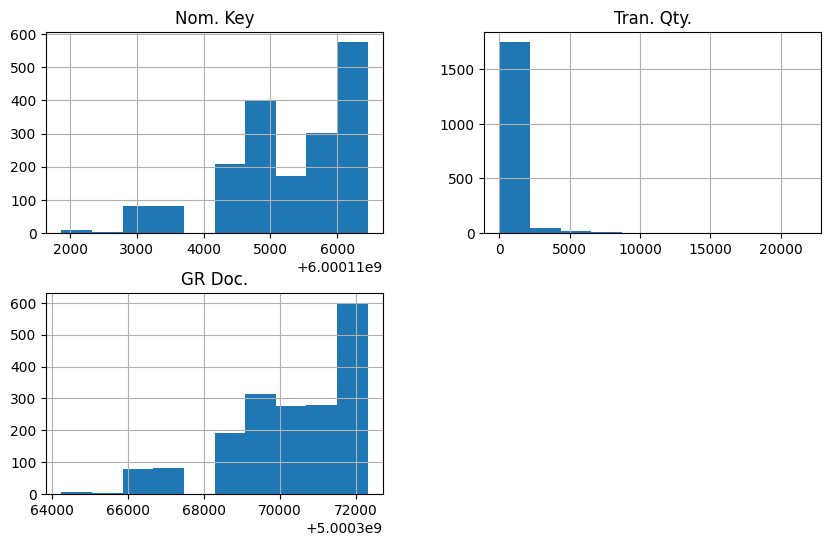

In [106]:
# Checking for the data distribution
df.hist(figsize=(10,6))
plt.show()

<ipython-input-107-f622e3309422>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tran. Qty.'])


<Axes: xlabel='Tran. Qty.', ylabel='Density'>

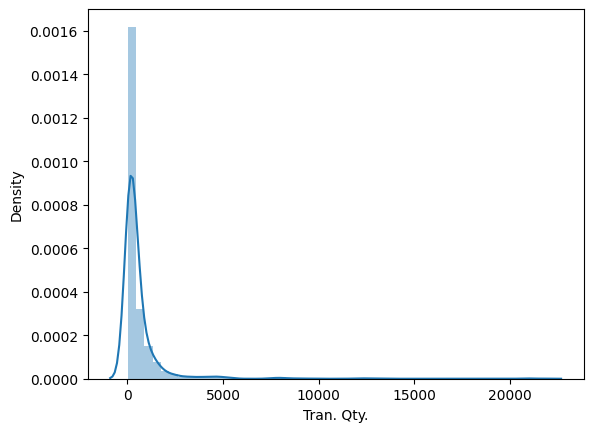

In [107]:
sns.distplot(df['Tran. Qty.'])

### Observation
The graphs show that the Transaction Quantity is Right Skeewed indicated by the long tail on the right side showing that there are few transactions with significantly higher quantities.
This shows that the Transaction Quantity needs to be transformed.

In [108]:
df1 = df.copy()

In [109]:
# convert reference date and transaction dates to datetime
# Strip whitespace from column names
df1.columns = df1.columns.str.strip()

# Convert date columns to datetime format for analysis
df1['Tr. Date'] = pd.to_datetime(df1['Tr. Date'], format='%d.%m.%Y')
df1['Ref Date'] = pd.to_datetime(df1['Ref Date'], format='%d.%m.%Y')

# Display the first few rows to verify
print(df1[['Tr. Date', 'Ref Date']].head())

    Tr. Date   Ref Date
0 2024-07-01 2024-06-25
1 2024-07-01 2024-06-23
2 2024-07-01 2024-06-23
3 2024-07-01 2024-06-23
4 2024-07-01 2024-05-29


### Data distribution after Date formating

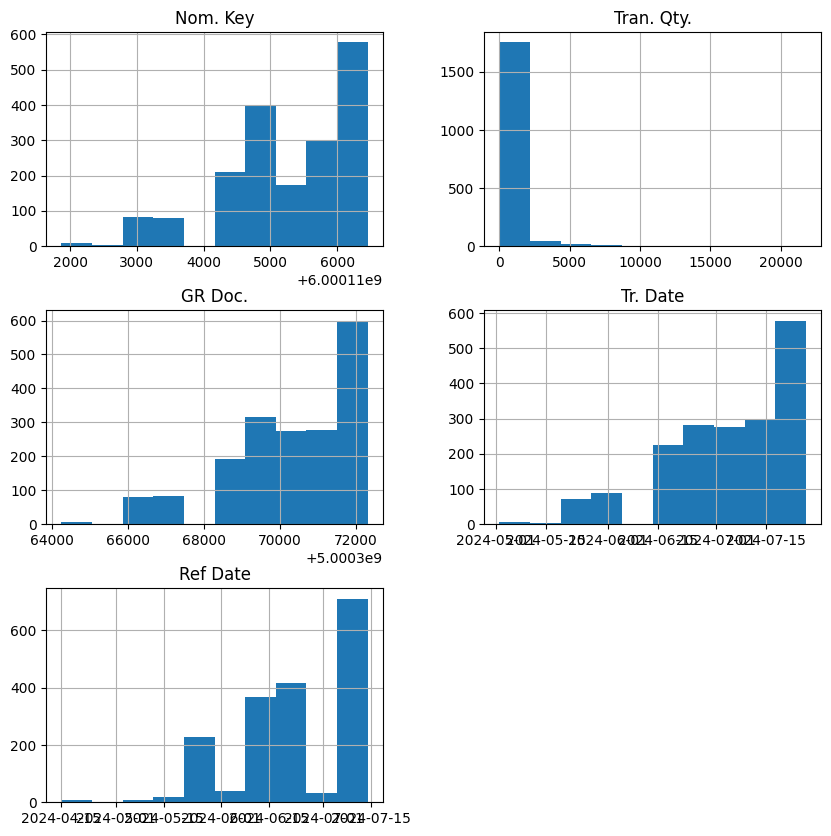

In [110]:
# Checking for the data distribution
df1.hist(figsize=(10,10))
plt.show()

### Observations
The graphs show that the Transaction date and Reference dates are Left Skeewed implying that more transactions were are done towards mid July than other dates

Remove Outliers from Transaction quantity

In [111]:
Q1 = df1['Tran. Qty.'].quantile(0.25)
Q3 = df1['Tran. Qty.'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1_no_outliers = df1[(df1['Tran. Qty.'] >= lower_bound) & (df1['Tran. Qty.'] <= upper_bound)]


Normalize the data

In [112]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1_no_outliers[['Tran. Qty.', 'GR Doc.']] = scaler.fit_transform(df1_no_outliers[['Tran. Qty.', 'GR Doc.']])


<ipython-input-112-588f55837362>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_outliers[['Tran. Qty.', 'GR Doc.']] = scaler.fit_transform(df1_no_outliers[['Tran. Qty.', 'GR Doc.']])


Convert the categorical data to numerical

In [113]:
df1_no_outliers_encoded = pd.get_dummies(df1_no_outliers, columns=['Nom. No.', 'Seller', 'Batch orig', 'Buyer', 'Batch dest', 'Material Description', 'UoM'])


In [114]:
# Distribution of sales across different materials
material_sales_distribution = df1['Material Description'].value_counts()
# Time series analysis of transaction quantities
df1['Tran. Qty.'] = pd.to_numeric(df1['Tran. Qty.'], errors='coerce')
time_series_analysis = df1.groupby('Tr. Date')['Tran. Qty.'].sum()

# Exclude non-numeric columns
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numeric columns only
correlation_matrix = df1[numeric_columns].corr()

# Display all correlations as a string
print(correlation_matrix.to_string())

            Nom. Key  Tran. Qty.   GR Doc.
Nom. Key    1.000000    0.007035  0.997709
Tran. Qty.  0.007035    1.000000  0.006024
GR Doc.     0.997709    0.006024  1.000000


### Heatmap to show the Correlations

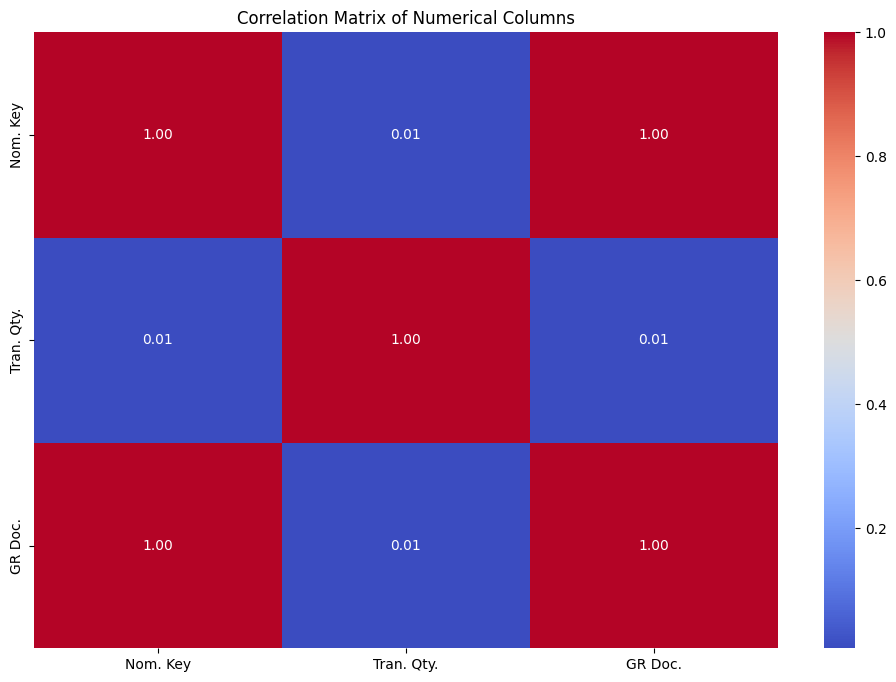

In [115]:
# Select only numeric columns
numeric_df1 = df1.select_dtypes(include='number')

# Correlation matrix of numerical columns
correlation_matrix = numeric_df1.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

**Observations**
The heatmap shows that thwre is no positive correlation between the Transaction Quantity and any othe feature since the figures are below 0.65

In [116]:
df2 = df1.copy()

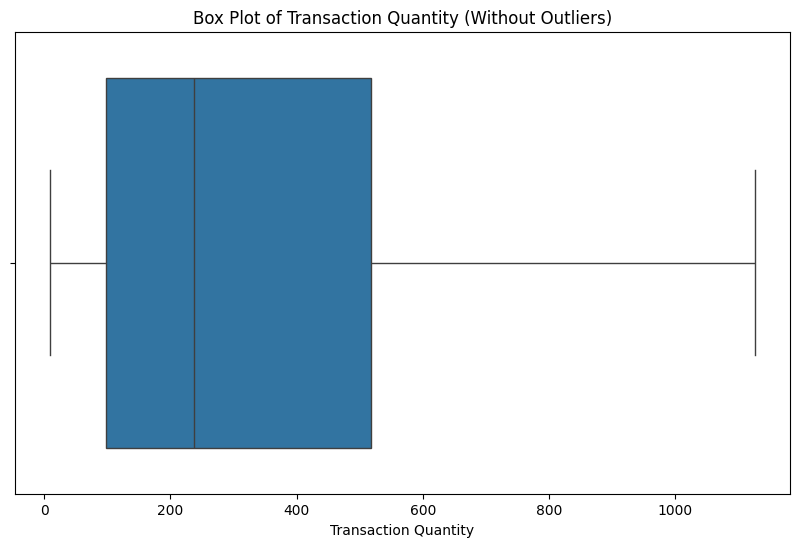

In [117]:
# Clean column names
df2.columns = [col.strip() for col in df2.columns]

# Drop rows with missing values in 'Tran. Qty.' column
df2 = df2.dropna(subset=['Tran. Qty.'])
# Plot box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df2['Tran. Qty.'], showfliers=False)
plt.title('Box Plot of Transaction Quantity (Without Outliers)')
plt.xlabel('Transaction Quantity')
plt.show()


### Insights from the Boxplot
#### 1. Central Tendency:

The median value of the transaction quantities is around 250.
#### 2. Interquartile Range (IQR):

The IQR, which is the range between the first quartile  and the third quartile, seems relatively wide. This suggests variability in transaction quantities.
#### 3. Symmetry:

The box plot appears to be slightly skewed to the left, indicating that there might be a higher number of smaller transaction quantities and fewer larger ones.
#### 4. Range:

The range (distance between the minimum and maximum values within the box plot) shows the spread of transaction quantities. Even after removing outliers, there is still a significant spread in the data.
#### 5. Outliers:

By excluding the outliers, we focus on the main bulk of the data, which provides a clearer view of the typical transaction quantities without being influenced by extreme values.

In summary, the transaction quantities have a median around 200, a fairly wide IQR indicating variability, and a slight right skew suggesting more smaller transactions compared to larger ones.











#### Separate Numerical and Categorical Features

In [118]:
# Separate numerical and categorical columns
numerical_data = df2.select_dtypes(include=[np.number])
categorical_data = df2.select_dtypes(include=['object', 'category'])

print("Numerical Columns:")
print(numerical_data.head(n=3).to_string())
print("Categorical Columns:")
print(categorical_data.head(n=3).to_string())

Numerical Columns:
     Nom. Key  Tran. Qty.     GR Doc.
0  6000115024     149.856  5000369947
1  6000115035     200.000  5000369963
2  6000115034      93.000  5000369960
Categorical Columns:
             Nom. No.                     Seller Batch orig                         Buyer Batch dest  Material Description  UoM     Partner Nom. no.
0      GULF/GEL/16115       Gulf  Energy Limited   300010LB              Lake Oil Limited   300024LB  MOTOR SPIRIT PREMIUM  M20   MT KMARIN-20240625
1   OILCOM/KPC/210724    Fossil Supplies Limited   300006LD             Be Energy Limited   300024LD     AUTOMOTIVE GASOIL  M20   MT MARLIN-20240623
2  KPC/AGO/2425/07/24  Ainushamsi Energy Limited   300094LD  STABEX INTERNATIONAL LIMITED   300194LD     AUTOMOTIVE GASOIL  M20  MARLINSARD-20240623


### Model Training and Evaluation

#### An ARIMA model

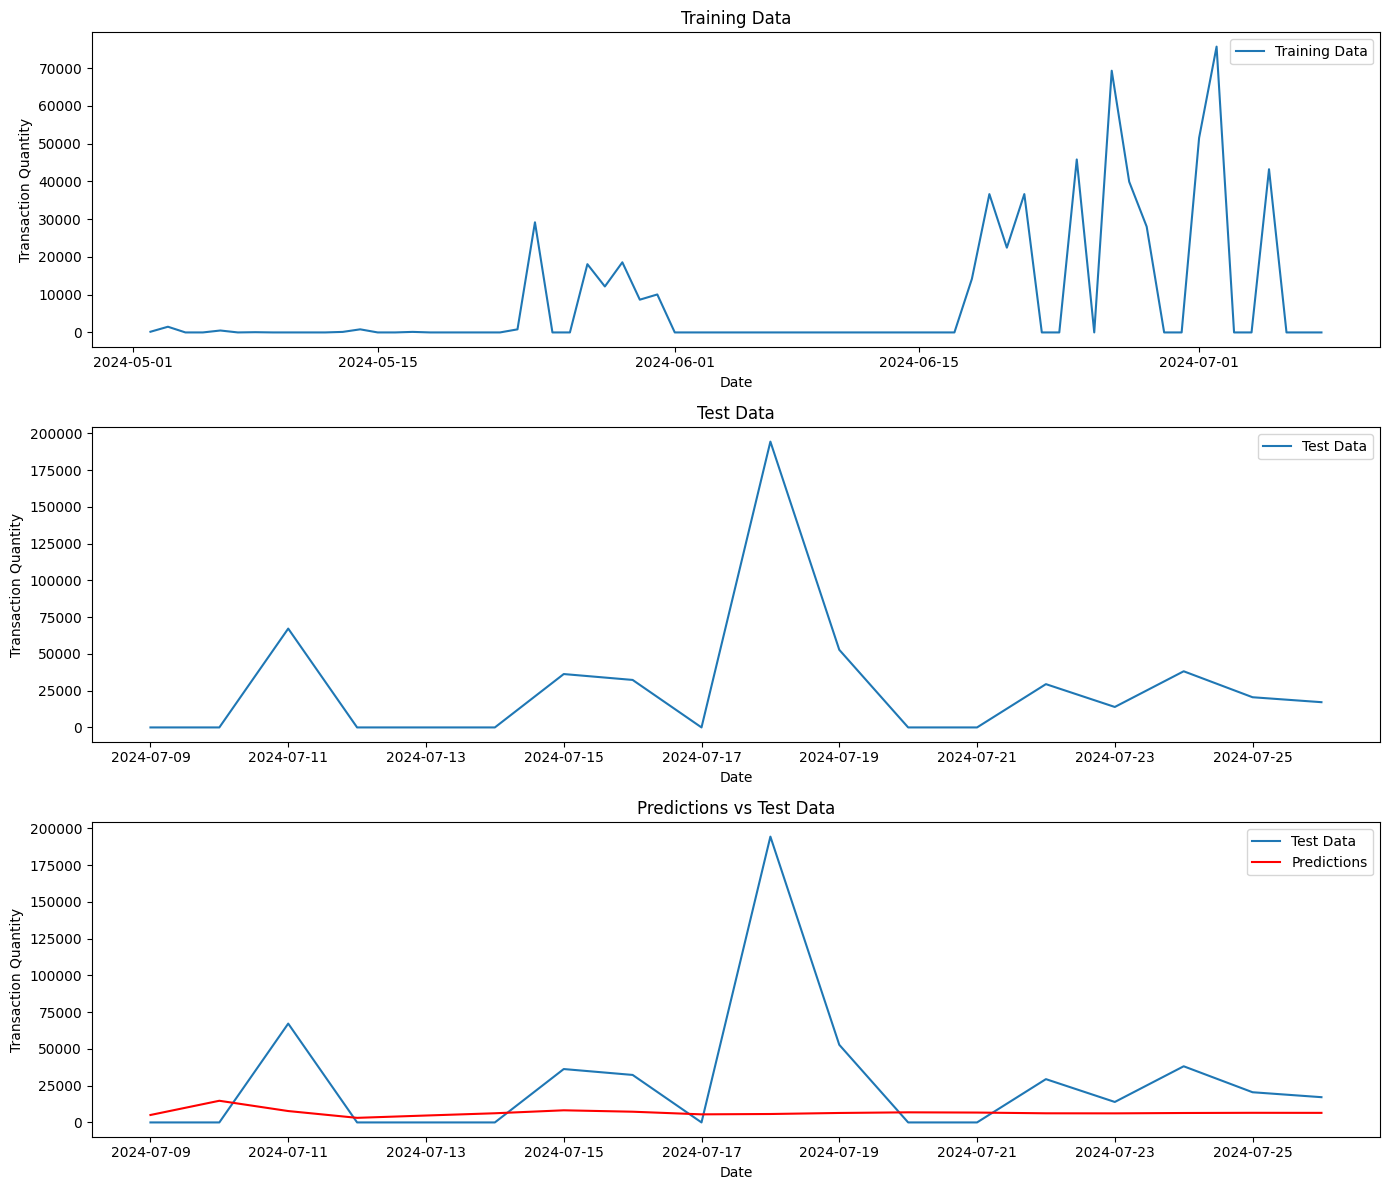

In [35]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare the data for time series forecasting
data = df2.sort_values(by='Tr. Date')
df2.set_index('Tr. Date', inplace=True)
sales_data = df2['Tran. Qty.'].resample('D').sum().fillna(0)

# Split the data into training and testing sets
train_data = sales_data[:int(0.8*len(sales_data))]
test_data = sales_data[int(0.8*len(sales_data)):]

# Fit the ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))
predictions = pd.Series(predictions, index=test_data.index)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12))

# Plot the training data
axes[0].plot(train_data, label='Training Data')
axes[0].set_title('Training Data')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Transaction Quantity')
axes[0].legend()

# Plot the test data
axes[1].plot(test_data, label='Test Data')
axes[1].set_title('Test Data')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Transaction Quantity')
axes[1].legend()

# Plot the predictions
axes[2].plot(test_data, label='Test Data')
axes[2].plot(predictions, label='Predictions', color='red')
axes[2].set_title('Predictions vs Test Data')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Transaction Quantity')
axes[2].legend()

plt.tight_layout()
plt.show()


The time series graphs provide a visual representation of the transaction quantities over time for the training and test datasets, as well as the predicted values against the actual test data. Here are some insights and their relation to sales forecasting and supply chain management:

### Training Data (First Graph)
- **Volatility and Trends**: The training data shows a significant amount of volatility with sudden spikes and drops in transaction quantities. There are periods of high activity followed by sudden drops to zero, indicating irregular sales patterns.
- **Identifying Peaks**: The spikes in the training data may correspond to specific events or promotions that caused a surge in sales. Understanding these peaks can help in predicting future similar events.
- **Data Gaps**: There are periods with no transaction quantities, suggesting possible data gaps or zero sales during those periods. This could be important for understanding seasonality or downtime in sales.

### Test Data (Second Graph)
- **Pattern Continuation**: The test data continues to show volatility with notable peaks and troughs, although the overall scale is larger than the training data. This suggests that the sales pattern is consistent with the training period but with greater variability. Implying that the significant peak in the middle of July indicates an event or factor that caused a substantial increase in sales. Identifying such events can help in future sales forecasting.

### Predictions vs Test Data (Third Graph)
- **Prediction Performance**: The predictions in red show a poor fit to the actual test data in blue. The model fails to capture the significant peaks and troughs observed in the test data, indicating underfitting.

### Insights for Sales Forecasting and Supply Chain Management
1. **Volatile Sales Patterns**: The irregular and volatile nature of sales requires robust forecasting models that can adapt to sudden changes and peaks. Traditional linear models may not suffice, and more sophisticated techniques like ARIMA, LSTM, or Prophet may be necessary.
2. **Event-Driven Spikes**: Recognizing the impact of specific events on sales can help in planning for inventory and supply chain needs. If certain promotions or events cause spikes, ensuring adequate stock levels and supply chain readiness will be crucial.
3. **Data Quality and Gaps**: Addressing data gaps and ensuring continuous data collection can improve the model’s ability to forecast accurately. Missing data points can skew the model’s understanding of sales patterns.


In conclusion, the current time series analysis highlights the need for more sophisticated modeling approaches to better capture the volatility and peaks in sales data. By improving forecasting accuracy, organizations can make more informed decisions about inventory and supply chain management, ultimately leading to more efficient operations and better service levels.

In [63]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 18.8 MB/s eta 0:00:00


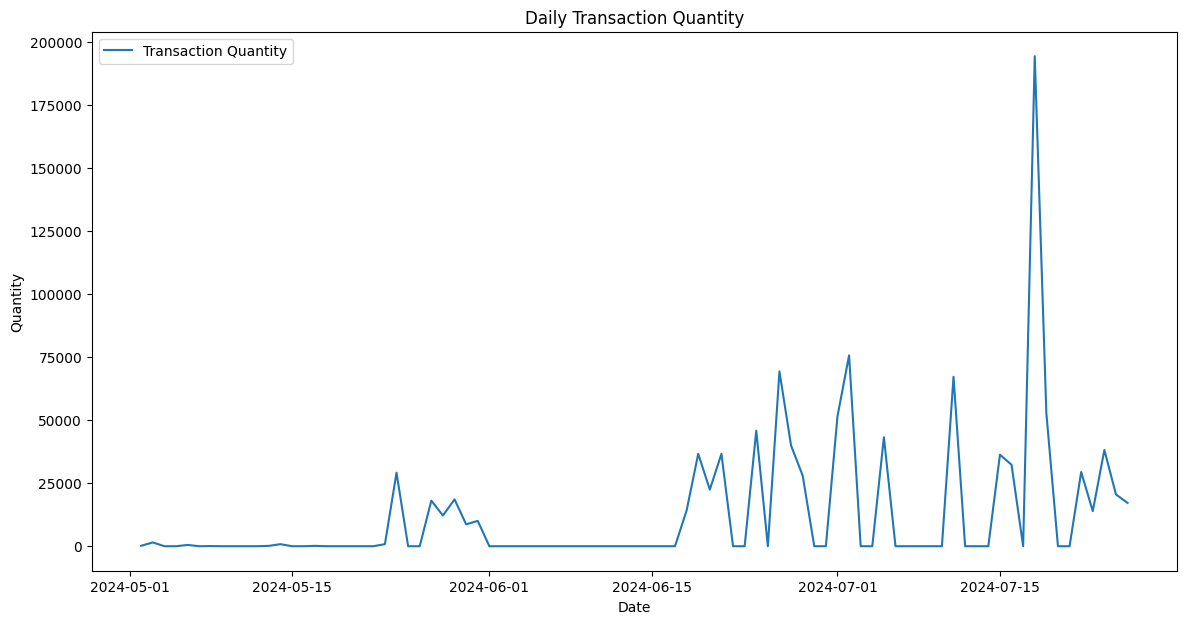

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.238e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 985.7527798658351
Iteration:      2,   Func. Count:     11,   Neg. LLF: 985.685204510731
Iteration:      3,   Func. Count:     16,   Neg. LLF: 985.6785834523406
Iteration:      4,   Func. Count:     20,   Neg. LLF: 985.6785834531588
Optimization terminated successfully    (Exit mode 0)
            Current function value: 985.6785834523406
            Iterations: 4
            Function evaluations: 20
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Tran. Qty.   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -985.679
Distribution:                  Normal   AIC:                           1979.36
Method:            Maximum Likelihood   BIC:                           1989.17
                                

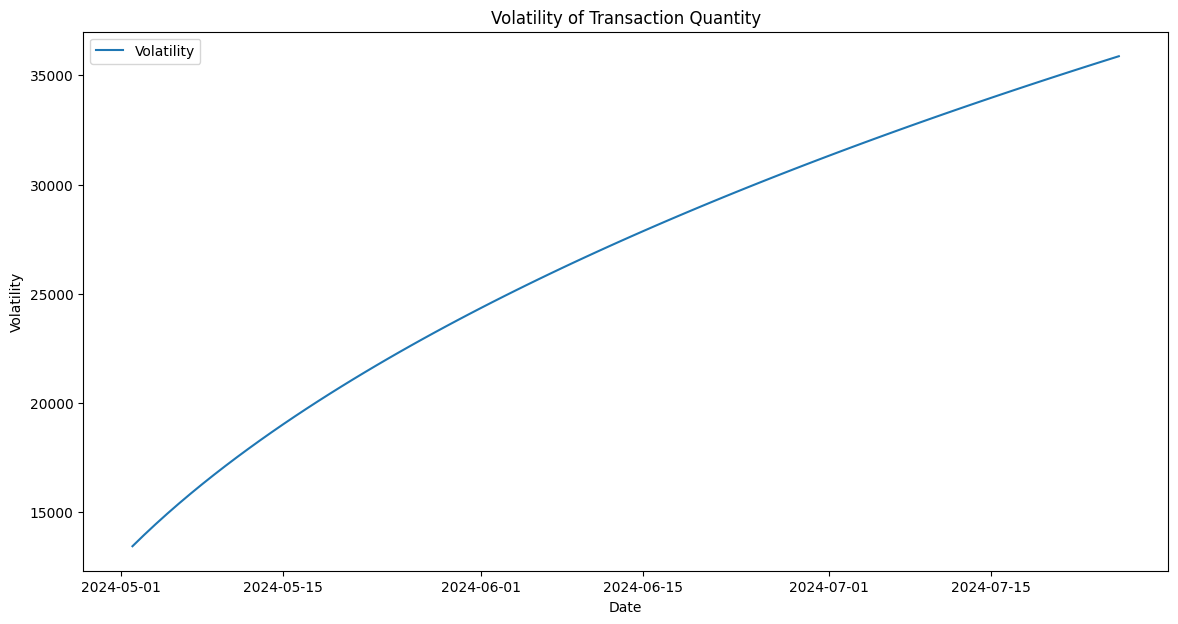

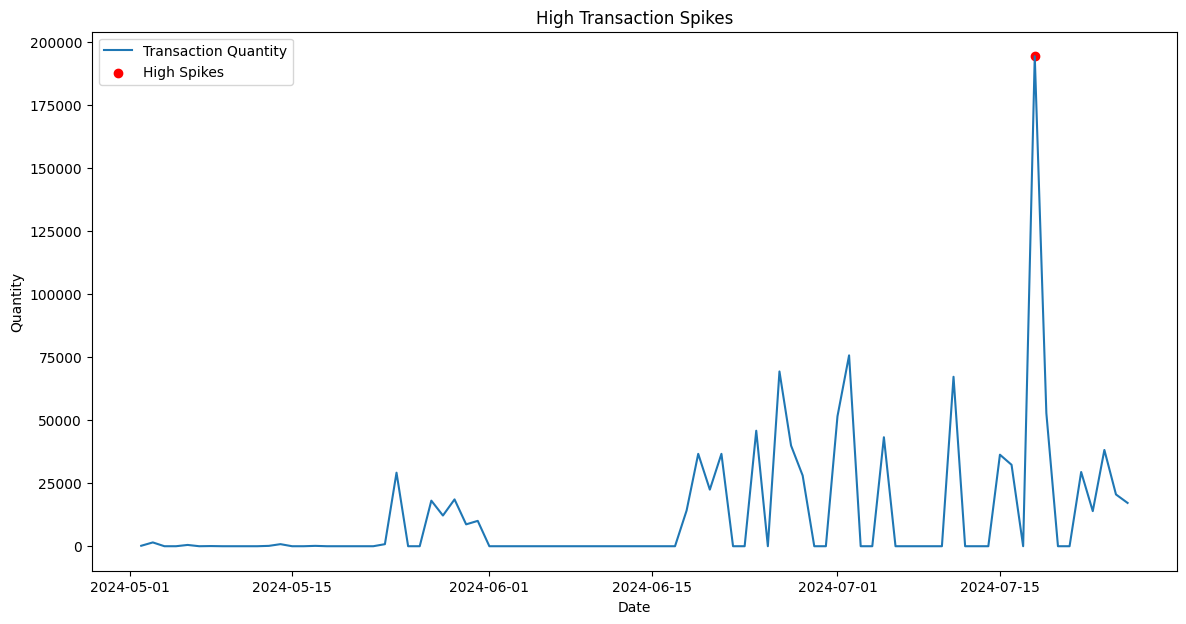

In [90]:
from arch import arch_model

# Convert 'Tr. Date' to datetime and sort the dataset by date
df2['Tr. Date'] = pd.to_datetime(df2['Tr. Date'])
data = df2.sort_values(by='Tr. Date')

# Set 'Tr. Date' as the index and resample the data to daily frequency, filling missing values with 0
df2.set_index('Tr. Date', inplace=True)
sales_data = df2['Tran. Qty.'].resample('D').sum().fillna(0)

# Plot the transaction quantity time series
plt.figure(figsize=(14, 7))
plt.plot(sales_data, label='Transaction Quantity')
plt.title('Daily Transaction Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Fit a GARCH model to the transaction quantity data
model = arch_model(sales_data, vol='Garch', p=1, q=1)
model_fit = model.fit()

# Print the summary of the GARCH model
print(model_fit.summary())

# Make volatility predictions
volatility = model_fit.conditional_volatility

# Plot the volatility
plt.figure(figsize=(14, 7))
plt.plot(volatility, label='Volatility')
plt.title('Volatility of Transaction Quantity')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Analyze high transaction spikes
high_spikes = sales_data[sales_data > sales_data.mean() + 3 * sales_data.std()]

# Plot high transaction spikes
plt.figure(figsize=(14, 7))
plt.plot(sales_data, label='Transaction Quantity')
plt.scatter(high_spikes.index, high_spikes, color='red', label='High Spikes')
plt.title('High Transaction Spikes')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


### Observations from the first Graph
The graph titled "Daily Transaction Quantity" provides a visual representation of the transaction quantities over a period from May 2024 to mid-July 2024. Here are some insights and their implications for sales forecasting and supply chain management:

### Insights

1. **Initial Stability**:
   - **May 2024**: The transaction quantities are relatively stable and low during the initial period (early May), indicating a period of steady but minimal sales activity implying that this period could represent a baseline level of demand without significant promotional activities or external influences.

2. **Increase in Volatility**:
   - **Mid to Late June 2024**: There is an increase in volatility with more frequent fluctuations in transaction quantities. Small peaks and troughs start to appear, suggesting varying sales activities meaning that this could be due to minor marketing campaigns, changes in consumer behavior, or other external factors influencing demand.

3. **Significant Spike**:
   - **Mid-July 2024**: There is a dramatic spike in transaction quantities, reaching a peak close to 200,000 units in a single day. This is followed by a sharp decline.Such a spike is likely due to a major promotional event, product launch, or seasonal demand. Understanding the cause of this spike is crucial for planning future inventory and supply chain adjustments.


### Implications for Sales Forecasting and Supply Chain Management

1. **Forecasting Accuracy**:
   - The significant variability and extreme spike in sales highlight the need for advanced forecasting methods that can account for sudden changes. Traditional linear models might not be sufficient, and more sophisticated techniques like ARIMA, SARIMA, or machine learning models e.g. LSTM could be more effective.
   - Incorporating external data e.g., promotional calendars can help improve the accuracy of forecasts.

2. **Supply Chain Agility**:
   - The volatility in sales suggests the need for an agile supply chain that can quickly adapt to changes in demand. This could involve diversifying suppliers, improving lead times, and enhancing the efficiency of the distribution network.
   - Real-time monitoring and analytics can help detect early signs of demand changes, allowing for prompt adjustments in the supply chain.

### Observations from the second Graph
The graph depicts the "Volatility of Transaction Quantity" over a specified period. Here are the insights that can be derived from this graph in the context of sales forecasting and supply chain optimization:

1. **Impact on Sales Forecasting**:
   - Traditional forecasting methods might need to be supplemented with advanced techniques such as machine learning models that can better capture and adapt to volatility.
   - Scenario planning can be beneficial to anticipate different future outcomes based on varying degrees of volatility.

2. **Risk Management**:
   - Increasing volatility requires a stronger focus on risk management strategies to prevent stockouts or excess inventory. This can include diversifying suppliers, enhancing demand sensing capabilities, and utilizing buffer inventories strategically.
   - Supply chain resilience can be improved by developing contingency plans to address potential disruptions that could exacerbate volatility.

### Recommendations

1. **Real-time Data Analytics**:
   - Invest in real-time data analytics to monitor sales trends and supply chain performance continuously.
   - Use predictive analytics to anticipate changes in transaction quantities and adjust strategies accordingly.

2. **Scenario Planning**:
   - Develop different scenarios based on varying levels of volatility and prepare corresponding action plans.
   - Regularly update these scenarios as new data becomes available to stay ahead of potential challenges.
### Conclusion

The graph provides valuable insights into the sales patterns over the observed period, emphasizing the need for robust forecasting models and agile supply chain strategies. By understanding the causes of demand fluctuations and preparing for future events, organizations can improve their sales forecasting accuracy and optimize their supply chain operations. By addressing the increasing volatility observed in transaction quantities, businesses can improve their sales forecasting accuracy and optimize their supply chain operations, leading to better overall performance and customer satisfaction.

### Develop a Neural Network Model

In [119]:
columns_to_drop = ['Buyer', 'Batch dest', 'Material Description', 'UoM', 'GR Doc.', 'Tr. Date', 'Ref Date']
data_cleaned = df2.drop(columns=columns_to_drop).dropna()

label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

X = data_cleaned.drop(columns=['Tran. Qty.'])
y = data_cleaned['Tran. Qty.']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Both LSTM and GRU Model Training and Evaluation

In [120]:
# Convert categorical variables to numerical representations
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10  # Number of past observations to consider
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=50, callbacks=[early_stopping])

# Predict and evaluate LSTM model
y_pred_lstm = lstm_model.predict(X_test)
print('LSTM MSE:', mean_squared_error(y_test, y_pred_lstm))

# Define GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(SEQ_LENGTH, X_train.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

# Train GRU model
gru_model.fit(X_train, y_train, validation_split=0.2, epochs=50, callbacks=[early_stopping])

# Predict and evaluate GRU model
y_pred_gru = gru_model.predict(X_test)
print('GRU MSE:', mean_squared_error(y_test, y_pred_gru))


Epoch 1/50
37/37 [==============================] - 3s 24ms/step - loss: 0.1825 - val_loss: 0.0701
Epoch 2/50
37/37 [==============================] - 0s 12ms/step - loss: 0.0697 - val_loss: 0.0674
Epoch 3/50
37/37 [==============================] - 0s 11ms/step - loss: 0.0677 - val_loss: 0.0665
Epoch 4/50
37/37 [==============================] - 0s 10ms/step - loss: 0.0658 - val_loss: 0.0666
Epoch 5/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0651 - val_loss: 0.0684
Epoch 6/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0656 - val_loss: 0.0658
Epoch 7/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0653 - val_loss: 0.0662
Epoch 8/50
37/37 [==============================] - 0s 9ms/step - loss: 0.0646 - val_loss: 0.0653
Epoch 9/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0648 - val_loss: 0.0651
Epoch 10/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0638 - val_loss: 0.0665
Epoch 11/50
37/

### Insights From the Neural Networks
**LSTM Model**

. Epochs 1-50: Shows the training progress over 50 epochs for an LSTM model.

. Loss: The loss value decreases over epochs, indicating that the model is improving in fitting the training data.

. Validation Loss: Tracks how well the model generalizes to unseen validation data. Ideally, this should also decrease over epochs, though occasional increases can occur due to overfitting or model complexity.

. MSE (Mean Squared Error): Represents the final MSE value after training, providing a quantitative measure of how well the model predicts compared to the actual values.

**GRU Model**

. Epochs 1-50: Similar to the LSTM, this section shows the training progress over 50 epochs for a GRU model.

. Loss: Similarly, tracks the loss during training.

. Validation Loss: Indicates how well the GRU model generalizes.

. MSE: Represents the final MSE for the GRU model after training.

**Comparison**

. MSE Comparison: The MSE values (LSTM MSE: 0.0661 and GRU MSE: 0.0686) provide a direct comparison of how well each model performed on the validation data. In this case, the LSTM model seems to have a slightly lower MSE, suggesting it might be performing marginally better for this specific task.